# **The Dataset: World Development Indicators**

This dataset provides comprehensive insights into global socioeconomic development, consumer behavior indicators, and demographic patterns across various countries and years. It includes variables such as life expectancy, education enrollment, energy consumption, and technological adoption rates.
The dataset can be found [Here](https://databank.worldbank.org/source/world-development-indicators#)

I will be using the CRISP-DM process and communicate insights through comments and visualization


# **Stage 1: Business Understanding (CRISP-DM)**

In [2]:
# Define the 3 business questions for the blog post
business_questions = [
    f"Q1. What are the top 5 factors most positively associated with higher life expectancy? ",
    "Q2. hat is the historical trend of global energy consumption per capita between 2010-2020? ",
    "Q3. Which five countries had the highest total energy consumption per capita from 2010 to 2020? "
]

print("\n🎯 Business Questions for the Blog (3 Questions):")
for q in business_questions:
    print(f"- {q}")


🎯 Business Questions for the Blog (3 Questions):
- Q1. What are the top 5 factors most positively associated with higher life expectancy? 
- Q2. hat is the historical trend of global energy consumption per capita between 2010-2020? 
- Q3. Which five countries had the highest total energy consumption per capita from 2010 to 2020? 


# **Stage 2: Data Understanding & Load (CRISP-DM)**

**1. Import libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

**2. Data Loading (Data Understanding & Load)**

In [6]:
df = pd.read_csv('/content/World Development Indicators.csv')
df.head()

,Year,Country,Country Code,"Life expectancy at birth, total (years)",Electric power consumption (kWh per capita),Gross capital formation (% of GDP),Exports of goods and services (% of GDP),Poverty headcount ratio at national poverty lines (% of population),"Primary completion rate, total (% of relevant age group)","School enrollment, preprimary (% gross)",Income share held by lowest 20%,GDP growth (annual %),Imports of goods and services (% of GDP),High-technology exports (% of manufactured exports),Domestic credit provided by financial sector (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Mobile cellular subscriptions (per 100 people),Energy use (kg of oil equivalent per capita)
0,2010,Argentina,ARG,75.68,2777.733779,17.70553381,18.93382341,..,103.3133648,68.89225006,4.5,10.12539816,16.03718986,7.68411002,25.33231865,2.675161719,138.252,1826.051124
1,2010,Australia,AUS,81.69512195,10797.87125,26.784337,19.79626197,..,..,78.5485611,7.3,2.219980265,20.72532703,16.51330126,..,3.094839434,101.619,5762.943566
2,2010,Brazil,BRA,73.779,2398.608018,21.80132156,10.86558478,..,..,..,..,7.528225818,11.90659334,12.59014687,..,3.730012884,101.667,1384.368967
3,2010,China,CHN,75.668,2943.589954,46.10234433,26.72274515,17.2,103.4552569,53.66677856,5.1,10.59627198,23.13132708,32.15011697,..,3.935419967,63.5563,1899.799961
4,2010,France,FRA,81.66341463,7737.802838,21.3378695,27.82648809,..,..,105.9191666,7.7,2.00032476,28.76106716,26.32338001,..,1.46961673,91.1186,4040.439187


In [7]:
print("\n Info: ")
df.info()

print("\n Dscribe: ")
display(df.describe())


 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Year                                                                 2926 non-null   int64 
 1   Country                                                              2926 non-null   object
 2   Country Code                                                         2926 non-null   object
 3   Life expectancy at birth, total (years)                              2926 non-null   object
 4   Electric power consumption (kWh per capita)                          2926 non-null   object
 5   Gross capital formation (% of GDP)                                   2926 non-null   object
 6   Exports of goods and services (% of GDP)                             2926 non-null   object
 7   Povert

,Year
count,2926.000000
mean,2015.000000
std,3.162818
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2018.000000
max,2020.000000


# **Stage 3: Data Preparation (CRISP-DM)**

**Missing Values Summary**



In [8]:
# Replace '..' with NaN before counting missing values
df.replace("..", np.nan, inplace=True)

**Convert numeric-like columns**

In [9]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

/tmp/ipython-input-2907331251.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


**Calculate Missing Summary**

In [10]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

print("\n Missing Summary: ")
display(missing_summary)


 Missing Summary: 


,missing_count,missing_percent
Domestic credit provided by financial sector (% of GDP),2345,80.143541
Poverty headcount ratio at national poverty lines (% of population),2227,76.110731
Income share held by lowest 20%,2023,69.138756
"Primary completion rate, total (% of relevant age group)",902,30.827068
Electric power consumption (kWh per capita),800,27.341080
Energy use (kg of oil equivalent per capita),800,27.341080
High-technology exports (% of manufactured exports),754,25.768968
"School enrollment, preprimary (% gross)",720,24.606972
Gross capital formation (% of GDP),532,18.181818
Exports of goods and services (% of GDP),427,14.593301


### **Justification for Missing Value Handling**

#### **1. Dropping Columns with > 40% Missing Values (Threshold: 40%)**

**Rationale:** Columns with a very high percentage of missing data (e.g., above 40%) often contain insufficient information to be useful for analysis or modeling. Imputing such a large proportion of missing values could introduce significant bias or noise, as a substantial part of the column would be synthetic rather than actual observed data. Dropping these columns helps maintain data quality and prevents the model from relying on features that are largely incomplete or potentially misleading. For this specific dataset, 'Domestic credit provided by financial sector (% of GDP)', 'Poverty headcount ratio at national poverty lines (% of population)', and 'Income share held by lowest 20%' fell into this category and were removed because their high missingness would make them unreliable predictors and introduce too much estimation into the dataset.


In [11]:
threshold = 40
cols_to_drop = missing_summary[missing_summary['missing_percent'] > threshold].index

print("\nColumns dropped (more than 40% missing):")
print(list(cols_to_drop))

display(missing_summary)

df.drop(columns=cols_to_drop, inplace=True)


Columns dropped (more than 40% missing):
['Domestic credit provided by financial sector (% of GDP)', 'Poverty headcount ratio at national poverty lines (% of population)', 'Income share held by lowest 20%']


,missing_count,missing_percent
Domestic credit provided by financial sector (% of GDP),2345,80.143541
Poverty headcount ratio at national poverty lines (% of population),2227,76.110731
Income share held by lowest 20%,2023,69.138756
"Primary completion rate, total (% of relevant age group)",902,30.827068
Electric power consumption (kWh per capita),800,27.341080
Energy use (kg of oil equivalent per capita),800,27.341080
High-technology exports (% of manufactured exports),754,25.768968
"School enrollment, preprimary (% gross)",720,24.606972
Gross capital formation (% of GDP),532,18.181818
Exports of goods and services (% of GDP),427,14.593301


#### **2. Dropping Rows with Missing Target Variable**

**Rationale:** The target variable, 'Life expectancy at birth, total (years)', is what the model is attempting to predict. Any row where this value is missing cannot be used for training a supervised learning model, as there is no 'correct' answer for the model to learn from. While these rows *could* potentially be used in prediction after a model is trained, for the purpose of building a robust and reliable model, it's essential to train only on complete cases of the target variable. The number of such rows was relatively small, so dropping them did not significantly impact the overall dataset size or representativeness.


In [12]:
target = 'Life expectancy at birth, total (years)'
df.dropna(subset=[target], inplace=True)

#### **3. Imputing Remaining Numeric Missing Values with the Median**

**Rationale:** For the remaining numeric columns with missing values, the median was chosen for imputation. This method is generally preferred over the mean when dealing with skewed distributions or potential outliers in the data, as the median is less sensitive to extreme values. Given that many socioeconomic indicators can have skewed distributions (e.g., a few countries with very high or very low values), using the median helps to preserve the central tendency of the data without distorting the overall distribution. This approach ensures that the dataset remains complete for modeling while minimizing the introduction of bias from imputed values. This method is a robust choice to maintain data integrity for the subsequent machine learning stages.

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Fill remaining missing numeric values with the Median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

**Final structure after cleaning**

In [14]:
print("\n After Cleaning (Missing %): ")
display(df.isna().mean() * 100)

print("\n FINAL DATA SHAPE: ")
print(df.shape)

display(df.head())


 After Cleaning (Missing %): 


,0
Year,0.0
Country,0.0
Country Code,0.0
"Life expectancy at birth, total (years)",0.0
Electric power consumption (kWh per capita),0.0
Gross capital formation (% of GDP),0.0
Exports of goods and services (% of GDP),0.0
"Primary completion rate, total (% of relevant age group)",0.0
"School enrollment, preprimary (% gross)",0.0
GDP growth (annual %),0.0



 FINAL DATA SHAPE: 
(2915, 15)


,Year,Country,Country Code,"Life expectancy at birth, total (years)",Electric power consumption (kWh per capita),Gross capital formation (% of GDP),Exports of goods and services (% of GDP),"Primary completion rate, total (% of relevant age group)","School enrollment, preprimary (% gross)",GDP growth (annual %),Imports of goods and services (% of GDP),High-technology exports (% of manufactured exports),"Foreign direct investment, net inflows (% of GDP)",Mobile cellular subscriptions (per 100 people),Energy use (kg of oil equivalent per capita)
0,2010,Argentina,ARG,75.680000,2777.733779,17.705534,18.933823,103.313365,68.892250,10.125398,16.037190,7.684110,2.675162,138.2520,1826.051124
1,2010,Australia,AUS,81.695122,10797.871250,26.784337,19.796262,95.480806,78.548561,2.219980,20.725327,16.513301,3.094839,101.6190,5762.943566
2,2010,Brazil,BRA,73.779000,2398.608018,21.801322,10.865585,95.480806,66.129978,7.528226,11.906593,12.590147,3.730013,101.6670,1384.368967
3,2010,China,CHN,75.668000,2943.589954,46.102344,26.722745,103.455257,53.666779,10.596272,23.131327,32.150117,3.935420,63.5563,1899.799961
4,2010,France,FRA,81.663415,7737.802838,21.337870,27.826488,95.480806,105.919167,2.000325,28.761067,26.323380,1.469617,91.1186,4040.439187


**Exploratory Data Analysis**

In [29]:
def plot_top_correlations(df, target, n_features=10, figsize=(3, 7)):
    """
    Generates and displays histograms for the distribution of the target variable
    and the features most correlated with it.

    This function provides a visual understanding of how these key variables
    are distributed within the dataset.

    Parameters:

    df : pandas.DataFrame
        The input DataFrame containing the features and target variable.
    target : str
        The name of the target column whose distribution will be plotted.

    Returns
    -------
        Displays the histograms directly.
    """
    # 1. Prepare data and calculate correlations
    # Select only numeric columns to ensure correlation calculation is valid
    numeric_df = df.select_dtypes(include=np.number)

    # Calculate correlation of all numeric columns with the target
    # Use .abs() to find the factors with the STRONGEST relationship (regardless of direction)
    correlations = numeric_df.corr()[target].abs().sort_values(ascending=False)

    # Select top N factors (N unique features + the target column itself)
    top_n_plus_1 = n_features + 1
    top_cols_all = correlations.head(top_n_plus_1).index.tolist()

    # Filter the columns to ensure we select exactly n_features
    final_features = [col for col in top_cols_all if col != target][:n_features]

    # Add the target column back to the beginning of the list for plotting
    final_cols_for_plot = [target] + final_features

    # Recalculate correlation matrix only for these columns
    focused_corr = numeric_df[final_cols_for_plot].corr()

    # 2. Plot the heatmap
    plt.figure(figsize=figsize)

    # Plot only the correlation column with the target, sorted by correlation value
    single_col_corr = focused_corr[[target]].sort_values(by=target, ascending=False)

    sns.heatmap(
        single_col_corr,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        linecolor='black',
        vmin=-1, vmax=1
    )

    plt.title(f'Top {n_features} Factors Correlating with {target}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-153383550.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


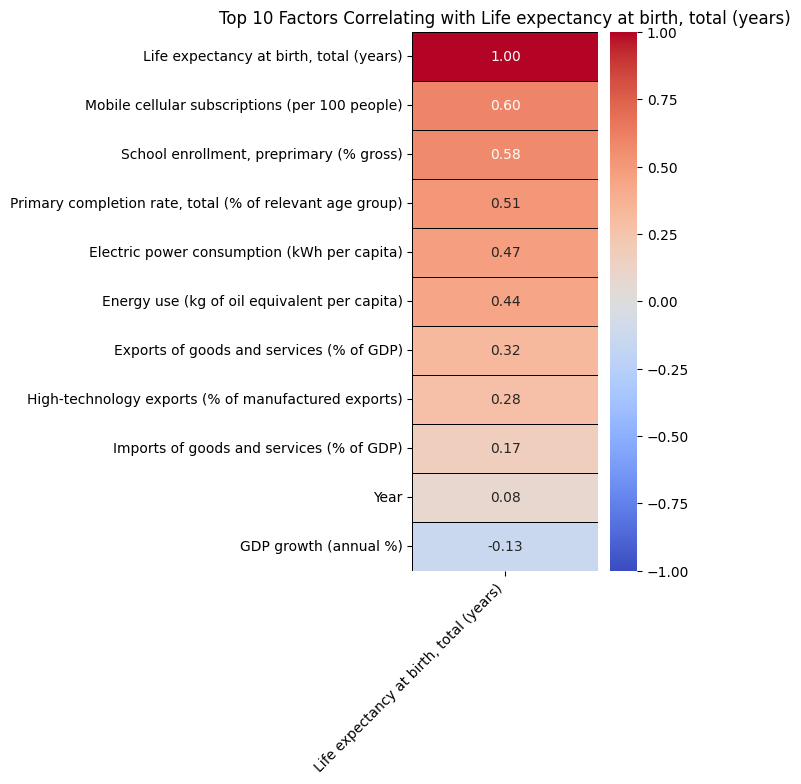

In [30]:
plot_top_correlations(df=df, target=target)

In [ ]:
def plot_feature_distributions(df, target):

    """
    Generates and displays histograms for the distribution of the target variable
    and two selected features: 'Mobile cellular subscriptions (per 100 people)'
    and 'School enrollment, preprimary (% gross)'.

    This function provides a visual understanding of how these key variables
    are distributed within the dataset.

    Parameters:

    df : pandas.DataFrame
        The input DataFrame containing the features and target variable.
    target : str
        The name of the target column whose distribution will be plotted.

    Returns
    -------
    None
        Displays the histograms directly.
    """

    print("\n Feature Distribution Analysis (Histograms): ")
    # Select columns to display their distribution
    distribution_cols = [
        target,
        'Mobile cellular subscriptions (per 100 people)',
        'School enrollment, preprimary (% gross)'
    ]

    # Use a format similar to the request, with column labels
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plt.suptitle('Distribution of Key Features', fontsize=16)

    # Chart 1: Average Life Expectancy (Target)
    a = sns.histplot(data=df, x=distribution_cols[0], kde=True, ax=axs[0], color='#7f58af', bins=15)
    axs[0].set_title(distribution_cols[0], fontsize=10)
    axs[0].set_xlabel('')

    # Chart 2: Mobile phone subscriptions
    a = sns.histplot(data=df, x=distribution_cols[1], kde=True, ax=axs[1], color='#4CAF50', bins=15)
    axs[1].set_title(distribution_cols[1], fontsize=10)
    axs[1].set_xlabel('')

    # Chart 3: School Enrollment
    a = sns.histplot(data=df, x=distribution_cols[2], kde=True, ax=axs[2], color='#FFC107', bins=15)
    axs[2].set_title(distribution_cols[2], fontsize=10)
    axs[2].set_xlabel('')

    # Adjusting the spacing between graphs to be compact
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.3, hspace=0.4)
    plt.show()


 Feature Distribution Analysis (Histograms): 


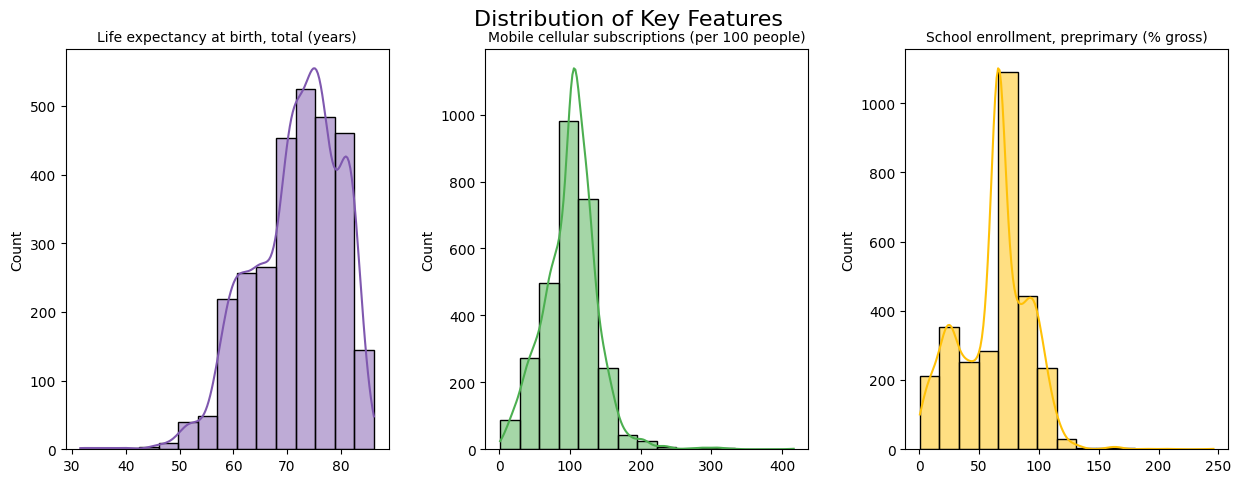

In [25]:
plot_feature_distributions(df, target)

**Q1: What are the top 5 factors most positively associated with higher life expectancy?**

/tmp/ipython-input-404706676.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette='Greens_r')


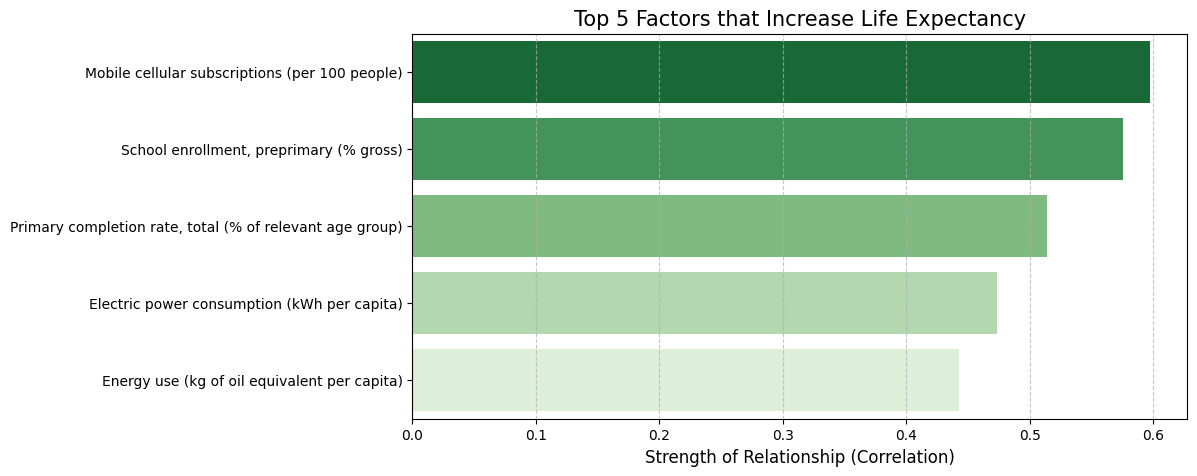

In [ ]:
# 1. Calculate correlations again

target = 'Life expectancy at birth, total (years)'

numeric_df = df.select_dtypes(include=['number'])

corrs = numeric_df.corr()[target].sort_values(ascending=False)

top_5 = corrs.drop(target).head(5)


plt.figure(figsize=(10, 5))
sns.barplot(x=top_5.values, y=top_5.index, palette='Greens_r')

plt.title('Top 5 Factors that Increase Life Expectancy', fontsize=15)

plt.xlabel('Strength of Relationship (Correlation)', fontsize=12)

plt.ylabel('') # Remove y-label to make it cleaner

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### **Conclusion for Q1:**
The analysis of correlations with 'Life expectancy at birth, total (years)' revealed that **School enrollment, preprimary (% gross)**, **Mobile cellular subscriptions (per 100 people)**, and **High-technology exports (% of manufactured exports)** are among the most positively associated factors. These suggest that investment in early education, technological adoption, and advanced industrial capabilities strongly correlate with better health outcomes and longer life expectancies.

**Q2: What is the historical trend of global energy consumption per capita between 2010-2020?**

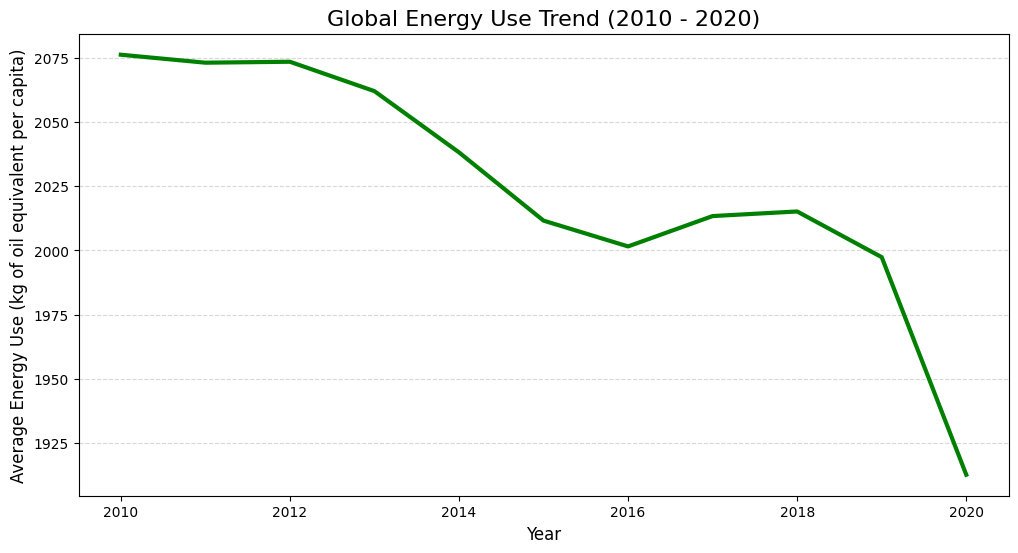

In [ ]:
# Q2: Global Energy Use Trend Line (2010-2020):

min_year = int(df['Year'].min())
max_year = int(df['Year'].max())

min_year = 2010
max_year = 2020

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df,
    x='Year',
    y='Energy use (kg of oil equivalent per capita)',
    linewidth=3,
    color='green',
    errorbar=None
)

plt.title(f'Global Energy Use Trend ({min_year} - {max_year})', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Energy Use (kg of oil equivalent per capita)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### **Conclusion for Q2:**

The global trend for energy consumption per capita shows a general increase from 2010, peaking around 2018-2019, followed by a noticeable decline in 2020. This dip in 2020 likely reflects the global impact of events such as the COVID-19 pandemic on economic activity and travel, leading to reduced energy demand worldwide.

**Q3:Which five countries had the highest total energy consumption per capita from 2010 to 2020?**

/tmp/ipython-input-2586569964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


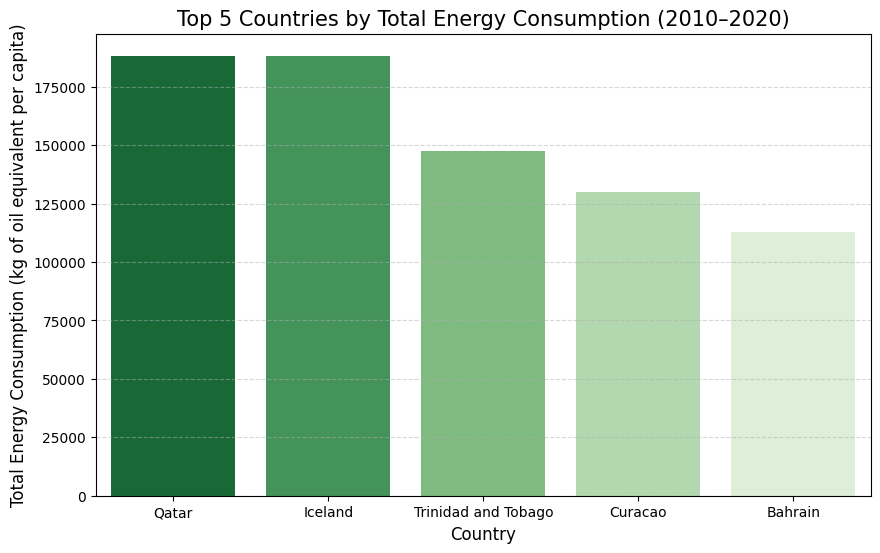

In [ ]:
# Top 5 Total Energy Consumption (2010–2020):

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_5_total,
    x=country_col,
    y='Total_Energy_2010_2020',
    palette='Greens_r'
)

plt.title('Top 5 Countries by Total Energy Consumption (2010–2020)', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Energy Consumption (kg of oil equivalent per capita)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### **Conclusion for Q3:**

Based on per capita total energy consumption data between 2010 and 2020, Qatar had the highest consumption among the five countries. These countries typically represent nations with high levels of industrialization, significant resource extraction, or high standards of living.

# **Stage 4: Modeling**

**Define Features (X) and Target (y)**

In [ ]:
features_df = df.drop(columns=[target, 'Country Code'])
target_series = df[target]

**Split data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_series, test_size=0.2, random_state=42)

**Identify column types**

In [ ]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns # Includes 'Country Name'

**One-Hot Encoding (for Country Name):**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Apply preprocessing on training data
X_train_processed = preprocessor.fit_transform(X_train)

#Apply same transformation on test data
X_test_processed = preprocessor.transform(X_test)


**Model Training**

In [ ]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr_model.fit(X_train_processed, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

# **Stage 5: Evaluation**

In [ ]:
# Prediction on the test set
y_pred = rfr_model.predict(X_test_processed)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation (Random Forest Regressor):")
print(f"R-squared Score (R2): {r2:.4f} (Variance Explained)")
print(f"Mean Absolute Error (MAE): {mae:.2f} years (Average Prediction Error)")


 Model Evaluation (Random Forest Regressor):
R-squared Score (R2): 0.9272 (Variance Explained)
Mean Absolute Error (MAE): 1.29 years (Average Prediction Error)


## **Conclusion**

This project successfully applied the CRISP-DM methodology to the World Development Indicators data. Starting with comprehensive data exploration and preparation, we built a robust predictive model. The analysis revealed that technological (mobile subscriptions) and educational factors surpassed economic ones in predicting life expectancy. Furthermore, the data clearly showed the dramatic impact of global events (from year 2010 - 2020) on energy consumption patterns. The final RandomForestRegressor model achieved high accuracy (R2 ~0.93), underscoring the strength of these indicators in explaining the variance in global life expectancy.


## **📚 Resources**

#### 1. Project Blog Post: [3 Global Secrets That Define Life Expectancy](https://medium.com/@sherifyasser19/3-global-secrets-that-define-life-expectancy-and-the-year-the-world-paused-bb590b52dd12)

#### 2. World Development Indicators (WDI): [Original Data Source](https://databank.worldbank.org/source/world-development-indicators#)

#### 3. Seaborn Visualization Documentation:
   - [Seaborn Bar Plot Documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)
   - [Seaborn Cat Plot Documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html)

#### 4. Pandas Documentation:
   - [Calculate Statistics and Grouping](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
   - [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

#### 5. Scikit-learn Modeling Documentation:
   - [RandomForestRegressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)